In [1]:
import pandas as pd
from process_bulk import ProcessBulk
import evaluation_helpers
from process_geography import Ward, LocalAuthority
from copy import deepcopy
from scipy import stats
import create_plots

In [2]:
pd.options.mode.copy_on_write = True
pd.set_option("future.no_silent_downcasting", True)

In [3]:
bulk_folder_name = "bulk_data"
ward_folder_name_tenure = "dc4201ew_htward"
index_sheet_name = "Cell Numbered DC Tables 3.2.xlsx"

cl_folder_name = "confidence_intervals"
cl_sheet_name = "2011censusconfidenceintervalsdec2013_tcm77-271638.xlsx"
cl_table_name = "95% CI widths (LA level)"

fig_folder_name = "figs/population_analysis/experiments"

p_cl = ProcessBulk(bulk_folder=cl_folder_name, index_sheet=cl_sheet_name)

p = ProcessBulk(bulk_folder=bulk_folder_name, index_sheet=index_sheet_name)

# Tenure by ethnic group by age - Household Reference Persons
table_name_tenure = "DC4201EW"

In [4]:
# list of ethnicities for filtering
general_ethnicities = [
    "White: Total",
    "Mixed/multiple ethnic group: Total",
    "Asian/Asian British: Total",
    "Black/African/Caribbean/Black British: Total",
    "Other ethnic group: Total",
]
detailed_ethnicities = [
    "White: English/Welsh/Scottish/Northern Irish/British",
    "White: Irish",
    "White: Gypsy or Irish Traveller",
    "White: Other White",
    "Mixed/multiple ethnic group: White and Black Caribbean",
    "Mixed/multiple ethnic group: White and Black African",
    "Mixed/multiple ethnic group: White and Asian",
    "Mixed/multiple ethnic group: Other Mixed",
    "Asian/Asian British: Indian",
    "Asian/Asian British: Pakistani",
    "Asian/Asian British: Bangladeshi",
    "Asian/Asian British: Chinese",
    "Asian/Asian British: Other Asian",
    "Black/African/Caribbean/Black British: African",
    "Black/African/Caribbean/Black British: Caribbean",
    "Black/African/Caribbean/Black British: Other Black",
    "Other ethnic group: Arab",
    "Other ethnic group: Any other ethnic group",
]


detailed_ethnicities_simplified = [
    "White: English/Welsh/Scottish/Northern Irish/British",
    "White: Irish",
    "White: Gypsy or Irish Traveller",
    "Other White",
    "White and Black Caribbean",
    "White and Black African",
    "White and Asian",
    "Mixed/multiple ethnic group: Other Mixed",
    "Indian",
    "Pakistani",
    "Bangladeshi",
    "Chinese",
    "Other Asian",
    "African",
    "Caribbean",
    "Other Black",
    "Arab",
    "Any other ethnic group",
]

# list of tenure categories for filtering
all_tenure = [
    "All categories: Tenure",
    "Owned or shared ownership: Total",
    "Owned: Owned outright",
    "Owned: Owned with a mortgage or loan or shared ownership",
    "Social rented: Total",
    "Social rented: Rented from council (Local Authority)",
    "Social rented: Other social rented",
    "Private rented or living rent free: Total",
    "Private rented: Private landlord or letting agency",
    "Private rented: Other private rented or living rent free",
]
general_tenure = [
    "Owned or shared ownership: Total",
    "Social rented: Total",
    "Private rented or living rent free: Total",
]
detailed_tenure = [
    "Owned: Owned outright",
    "Owned: Owned with a mortgage or loan or shared ownership",
    "Social rented: Rented from council (Local Authority)",
    "Social rented: Other social rented",
    "Private rented: Private landlord or letting agency",
    "Private rented: Other private rented or living rent free",
]

In [5]:
mus = [1.0, 0.5, 0.1, 0.01, 0.001, 0.0001]
epsilons = [0.001, 0.01, 0.1, 1, 3, 5, 10]
epsilons_short = [0.001, 0.01, 0.1, 1]
epsilons_shorter = [0.01, 0.1, 1]

In [6]:
column_names = ["Age", "Tenure", "EthnicGroup", "Dataset"]

dfs_ward = p.set_up(
    table_name=table_name_tenure,
    df_type="nested",
    column_names=column_names,
    num_nested_category=10,
    subfolder=ward_folder_name_tenure,
    level=6,
)
dfs_la = p.set_up(
    table_name=table_name_tenure,
    df_type="nested",
    column_names=column_names,
    num_nested_category=10,
    subfolder=ward_folder_name_tenure,
    level=5,
)

../data/potential_datasets/BulkDCHousingLAandinfo/dc4201ew_htward


../data/potential_datasets/BulkDCHousingLAandinfo/dc4201ew_htward


In [7]:
ward = Ward()
local_authority = LocalAuthority()
# geo lookup file is the same for region and ward
geo_lookup = ward.get_geo_lookup_ward()

In [8]:
# colorschemes from https://personal.sron.nl/~pault/#fig:scheme_bright

colors_2 = ["#DDAA33", "#BB5566"]
colors_3 = ["#004488", "#DDAA33", "#BB5566"]
colors_4 = ["#004488", "#DDAA33", "#BB5566", "#1B7837"]
colors_5 = ["#004488", "#DDAA33", "#BB5566", "#1B7837", "#EE7733"] 
colors_bright = [
    "#4477AA",
    "#EE6677",
    "#228833",
    "#CCBB44",
    "#66CCEE",
    "#AA3377",
    "#BBBBBB",
]
colors_vibrant = [
    "#EE7733",
    "#0077BB",
    "#33BBEE",
    "#EE3377",
    "#CC3311",
    "#009988",
    "#BBBBBB",
]
colors_muted = [
    "#CC6677",
    "#332288",
    "#DDCC77",
    "#117733",
    "#88CCEE",
    "#882255",
    "#44AA99",
    "#999933",
    "#AA4499",
]

colors_grey = ["#EF233C", "#B7BFCC", "#8894AA", "#2B2F42"]

In [9]:
# ward codes and names of the 3 wards I have chosen for analysis
ward_codes = ["E36002358", "E36000439", "E36003322"]
ward_codes_extended = ["E36002358", "E36000439", "E36003322", "E36001940", "E36006779"]
# ward with the largest population
largest_ward = ["E36006779"]
# ward with the smallest population in England (excluding Wales)
smallest_ward = ["E36001940"]
ward_labels_large_small = ["Ennerdale (small ward)", "Ladywood (large ward)"]
ward_names_large_small = ["Ennerdale", "Ladywood"]
ward_names_diversity = [
    "Teign Valley (low diversity)",
    "Newport East (medium diversity)",
    "Nash Mills (high diversity)",
]
ward_names = ["Teign Valley", "Newport East", "Nash Mills"]
ward_names_extended = [
    "Teign Valley",
    "Newport East",
    "Nash Mills",
    "Ennerdale",
    "Ladywood",
]
ward_labels_extended = [
    "Teign Valley (low diversity)",
    "Newport East (medium diversity)",
    "Nash Mills (high diversity)",
    "Ennerdale (small ward)",
    "Ladywood (large ward)",
]

In [10]:
rmse_list = ["rmse_data_error", "rmse_dp", "rmse_data_error_dp"]
rmse_dp_list = ["rmse_dp", "rmse_data_error_dp"]
inc_dec_total_list = [
    "significantly_decreased_data_error",
    "significantly_increased_data_error",
    "significantly_decreased",
    "significantly_increased",
    "significantly_decreased_data_error_dp",
    "significantly_increased_data_error_dp",
    "significantly_decreased_minority",
    "significantly_increased_minority",
    "significantly_decreased_data_error_dp_minority",
    "significantly_increased_data_error_dp_minority",
    "significantly_increased_zero",
    "significantly_increased_data_error_dp_zero",
    "significantly_decreased_zero",
    "significantly_decreased_data_error_dp_zero",
    "number_ethnicities",
    "number_minorities",
    "significantly_increased_data_error_zero",
    "significantly_increased_data_error_minority",
    "significantly_decreased_data_error_zero",
    "significantly_decreased_data_error_minority",
]
population_list = ["total %", "data error %"]
population_list_dp = ["dp %", "dp data error %"]
population_numbers_list = ["PopulationNumbers", "PopulationNumbersDataError"]
population_numbers_list_dp = ["PopulationNumbersDP", "PopulationNumbersDataErrorDP"]
inc_dec_list = [
    "significantly_decreased_data_error",
    "significantly_increased_data_error",
    "significantly_increased_data_error_zero",
    "significantly_decreased_data_error_zero",
]
inc_dec_list_dp = [
    "significantly_decreased",
    "significantly_decreased_zero",
    "significantly_increased",
    "significantly_increased_zero",
    "significantly_decreased_data_error_DP",
    "significantly_increased_data_error_DP",
    "significantly_increased_data_error_DP_zero",
    "significantly_decreased_data_error_DP_zero",
]
kl_list = ["kl_divergence", "kl_divergence_data_error", "kl_divergence_data_error_dp"]

labels_wards = [
    "Teign Valley (low diversity)",
    "Newport East (medium diversity)",
    "Nash Mills (high diversity)",
]


table_features_pop = ["total", "total_dp"]
table_features_worst_case = ["largest_observed", "lowest_observed"]
table_features_pop_data_error = [
    "total",
    "total_data_error",
    "total_dp",
    "total_data_error_dp",
]

In [11]:
# reading in the confidence intervals for all local authorities
sheet_cl = p_cl.read_cl(cl_table_name)

In [12]:
df_la = local_authority.get_local_authority(dfs_la["csv_df"], geo_lookup)

In [13]:
df_ward = ward.get_ward(dfs_ward["csv_df"], geo_lookup)

Now I load the 3 wards I have chosen. 

In [14]:
filter_dict_ward = {
    "Age": ["All categories: Age"],
    "Tenure": ["All categories: Tenure"],
    "EthnicGroup": detailed_ethnicities,
}

wards = evaluation_helpers.get_filtered_df_ward_dict(
    p, ward, df_ward, ward_codes_extended, dfs_ward["lookup_df"], filter_dict_ward
)

In [16]:
experiments_geo_clip = evaluation_helpers.set_up_measurements_wards_repeat(
    1000,
    wards,
    df_ward,
    sheet_cl,
    "geometric",
    epsilons_short,
    delta=0,
    sensitivity=2,
    clipping=True,
    rounding=False,
)

In [18]:
measurement_kl_divergence_df_geo_clip = (
    evaluation_helpers.measure_kl_divergence_experiments(
        experiments_geo_clip, ward_codes_extended, epsilons_short, mus
    )
)

0
1


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [20]:
experiments_geo_no_clip = evaluation_helpers.set_up_measurements_wards_repeat(
    1000,
    wards,
    df_ward,
    sheet_cl,
    "geometric",
    epsilons_short,
    delta=0,
    sensitivity=2,
    clipping=False,
    rounding=False,
)

In [22]:
experiments_geo_clip_no_rand = (
    evaluation_helpers.set_up_measurements_wards_repeat_no_rand(
        1000,
        wards,
        df_ward,
        sheet_cl,
        "geometric",
        epsilons_short,
        delta=0,
        sensitivity=2,
        clipping=True,
        rounding=False,
    )
)

In [23]:
experiments_geo_clip_random_seed = (
    evaluation_helpers.set_up_measurements_wards_repeat_random_seed(
        1000,
        wards,
        df_ward,
        sheet_cl,
        "geometric",
        epsilons_short,
        delta=0,
        sensitivity=2,
        clipping=True,
        rounding=False,
    )
)

In [24]:
experiments_geo_no_clip_random_seed = (
    evaluation_helpers.set_up_measurements_wards_repeat_random_seed(
        1000,
        wards,
        df_ward,
        sheet_cl,
        "geometric",
        epsilons_short,
        delta=0,
        sensitivity=2,
        clipping=False,
        rounding=False,
    )
)

In [25]:
experiments_geo_no_clip_no_rand = (
    evaluation_helpers.set_up_measurements_wards_repeat_no_rand(
        1000,
        wards,
        df_ward,
        sheet_cl,
        "geometric",
        epsilons_short,
        delta=0,
        sensitivity=2,
        clipping=False,
        rounding=False,
    )
)

In [30]:
def create_column_names(epsilons, population_list_dp):

    column_names = []

    for epsilon in epsilons:
        new_list = [s + f" {epsilon}" for s in population_list_dp]
        column_names.extend(new_list)

    return column_names

In [31]:
population_list_full = (
    create_column_names(epsilons_short, population_list_dp) + population_list
)


In [32]:
inc_dec_list_full = create_column_names(epsilons_short, inc_dec_list_dp) + inc_dec_list

In [33]:
population_numbers_list_full = (
    create_column_names(epsilons_short, population_numbers_list_dp)
    + population_numbers_list
)

In [34]:
def create_errors(population_df, column_name):
    population_df["error"] = abs(population_df["total %"] - population_df[column_name])
    

In [35]:
features_full = inc_dec_list_full + population_numbers_list_full

In [36]:
df_populations_geo_clip = evaluation_helpers.make_experiment_df_populations(
    experiments_geo_clip,
    ward_codes_extended,
    population_list_full,
    population_list_dp,
    inc_dec_list_full + population_numbers_list_full,
    inc_dec_list_dp + population_numbers_list_dp,
)

df list 1000
list wards1000
df list 1000
list wards2000
df list 1000
list wards3000
df list 1000
list wards4000
df list 1000
list wards5000


In [40]:
create_errors(df_populations_geo_clip, "dp %")

In [41]:
df_populations_geo = evaluation_helpers.make_experiment_df_populations(
    experiments_geo_no_clip,
    ward_codes_extended,
    population_list_full,
    population_list_dp,
    inc_dec_list_full + population_numbers_list_full,
    inc_dec_list_dp + population_numbers_list_dp,
)

df list 1000
list wards1000
df list 1000
list wards2000
df list 1000
list wards3000
df list 1000
list wards4000
df list 1000
list wards5000


In [43]:
create_errors(df_populations_geo, "dp %")

In [53]:
create_plots.population_plot_scatterplot(
    df_populations_geo,
    "inc_frac",
    "Probability to be Significantly Increased",
    epsilons_short,
    colors_5,
    "Significantly Increased Groups with Geometric Mechanism",
    fig_folder_name,
    "scatter_inc_geometric",
)

In [54]:
create_plots.population_plot_scatterplot(
    df_populations_geo_clip,
    "inc_frac",
    "Probability to be Significantly Increased",
    epsilons_short,
    colors_5,
    "Significantly Increased Groups with Geometric Mechanism and Clipping",
    fig_folder_name,
    "scatter_inc_geometric_clip",
)

In [55]:
create_plots.population_plot_scatterplot(
    df_populations_geo,
    "dec_frac",
    "Probability to be Significantly Decreased",
    epsilons_short,
    colors_5,
    "Significantly Decreased Groups with Geometric Mechanism",
    fig_folder_name,
    "scatter_dec_geometric",
)

In [56]:
create_plots.population_plot_scatterplot(
    df_populations_geo_clip,
    "dec_frac",
    "Probability to be Significantly Decreased",
    epsilons_short,
    colors_5,
    "Significantly Decreased Groups with Geometric Mechanism and Clipping",
    fig_folder_name,
    "scatter_dec_geometric_clip",
)

In [60]:
create_plots.population_plot_error_bars_data_error_numbers(
    df_populations_geo,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="",
    file_name="",
    showfliers=True,
)

In [61]:
create_plots.population_plot_error_bars_data_error_boxen(
    df_populations_geo,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="",
    file_name="",
    showfliers=True,
)

In [65]:
create_plots.population_plot_error_bars_numbers(
    df_populations_geo,
    "PopulationNumbersDP",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="",
    file_name="_line_1",
    showfliers=True,
    lineval=1,
)

In [66]:
create_plots.population_plot_error_bars_boxen(
    df_populations_geo,
    "dp %",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="",
    file_name="_line_0_5",
    showfliers=True,
    lineval=0.5,
)

In [67]:
create_plots.population_plot_error_bars_boxen(
    df_populations_geo,
    "dp %",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="",
    file_name="_no_symlog_line_0_5",
    showfliers=True,
    symlog=False,
    lineval=0.5,
)

In [68]:
create_plots.population_plot_error_bars_numbers(
    df_populations_geo_clip,
    "PopulationNumbersDP",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="Clipping and ",
    file_name="_clipping_line_1",
    showfliers=True,
    lineval=1,
)

In [69]:
create_plots.population_plot_error_bars_boxen(
    df_populations_geo_clip,
    "dp %",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="Clipping and ",
    file_name="_clipping_line_0_5",
    showfliers=True,
    lineval=0.5,
)

In [70]:
create_plots.population_plot_error_bars_boxen(
    df_populations_geo_clip,
    "dp %",
    epsilons_short,
    ward_names,
    labels_wards,
    colors_grey,
    fig_folder_name,
    title="Clipping and ",
    file_name="_clipping_no_symlog_line_0_5",
    showfliers=True,
    symlog=False,
    lineval=0.5,
)

In [78]:
df_population_reduced = df_populations_geo_clip.query(
    'area_name == "Nash Mills" & epsilon == 0.1'
)
df_population_reduced.sort_values(by=["total %"], inplace=True, ascending=False)
df_population_reduced["error"] = abs(
    df_population_reduced["total %"] - df_population_reduced["dp %"]
)

In [79]:
df_merged = evaluation_helpers.make_experiment_df_merged(
    experiments_geo_clip,
    experiments_geo_no_clip,
    ward_names_extended,
    rmse_list + inc_dec_total_list,
    epsilons_short,
)
df_clip = evaluation_helpers.make_experiment_df(
    experiments_geo_clip,
    ward_names_extended,
    rmse_list + inc_dec_total_list,
    epsilons_short,
)
df = evaluation_helpers.make_experiment_df(
    experiments_geo_no_clip,
    ward_names_extended,
    rmse_list + inc_dec_total_list,
    epsilons_short,
)

In [83]:
df_clip_kl = evaluation_helpers.make_experiment_df_kl(
    measurement_kl_divergence_df_geo_clip,
    ward_names_extended,
    kl_list,
    epsilons_short,
    mus,
)

In [84]:
create_plots.kl_experiments_scatter(
    df_clip_kl,
    0.0001,
    ward_labels_extended,
    colors_5,
    fig_folder_name,
    "- Geometric Mechanism",
    filename="_geo",
)

In [85]:
create_plots.kl_experiments_line(
    df_clip_kl,
    0.0001,
    ward_labels_extended,
    colors_5,
    fig_folder_name,
    "- Geometric Mechanism",
    filename="_geo",
)

In [86]:
create_plots.rmse_experiments(
    df_clip,
    ward_labels_extended,
    colors_5,
    fig_folder_name,
    "- Geometric Mechanism",
    filename="_geo",
)

In [87]:
create_plots.create_boxplot_merged_experiments_kl(
    df_clip_kl, "kl_divergence", 0.1, fig_folder_name, "- Geometric Mechanism", "_geo"
)

In [88]:
create_plots.create_boxplot_merged_experiments_kl(
    df_clip_kl, "kl_divergence", 0.001, fig_folder_name, "- Geometric Mechanism", "_geo"
)

In [90]:
create_plots.create_boxplot_experiments_kl(
    df_clip_kl,
    "kl_divergence",
    0.0001,
    fig_folder_name,
    colors_4,
    "- Geometric Mechanism",
    "_geo",
)

In [91]:
df_merged_pop = evaluation_helpers.make_experiment_df_merged(
    experiments_geo_clip,
    experiments_geo_no_clip,
    ward_names_extended,
    table_features_pop,
    epsilons_short,
)

In [92]:
def make_experiment_metric_df_data_error(experiments):
    df_list = []

    for i in range(len(experiments)):
        metrics_df = experiments[i]["metrics_df"].copy(deep=True)
        df_list.append(metrics_df)
        metrics_df.reset_index(inplace=True)

    dfs = pd.concat(df_list, axis=0, ignore_index=True, sort=False)
    dfs["lowest_observed"] = dfs.groupby(["epsilon", "area_name"])[
        "total_data_error"
    ].transform("min")
    dfs["largest_observed"] = dfs.groupby(["epsilon", "area_name"])[
        "total_data_error"
    ].transform("max")

    return dfs

In [93]:
def create_experiments_table_pop_data_error(experiments, table_features):
    metrics_df = make_experiment_metric_df_data_error(experiments)
    df_median = metrics_df.groupby(["epsilon", "area_name"])[table_features].median()
    latex_table = df_median.to_latex(
        index=True, multirow=True, escape=False, float_format="{:0.0f}".format
    )
    print(latex_table)

In [94]:
create_experiments_table_pop_data_error(
    experiments_geo_no_clip, ["total", "total_data_error"] + table_features_worst_case
)

In [95]:
create_plots.create_experiments_table_pop(
    experiments_geo_no_clip, table_features_pop_data_error
)

In [96]:
create_plots.create_experiments_table_pop_merged(
    experiments_geo_no_clip,
    experiments_geo_clip,
    table_features_pop + table_features_worst_case,
    ["total_dp"] + table_features_worst_case,
)

In [97]:
create_plots.create_experiments_table_pop_merged(
    experiments_geo_no_clip,
    experiments_geo_clip,
    table_features_pop_data_error,
    ["total_dp", "total_data_error_dp"],
)

In [98]:
epsilons_short_reverse = epsilons_short.copy()
epsilons_short_reverse.reverse()

In [99]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased",
    ward_names,
    labels_wards,
    fig_folder_name,
)

In [100]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
)

In [101]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased",
    ward_names_large_small,
    ward_labels_large_small,
    fig_folder_name,
    "_large_small",
)

In [102]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_increased",
    ward_names,
    labels_wards,
    fig_folder_name,
    "_clip",
    "With Clipping",
)

In [103]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_clip_all_wards",
    "With Clipping",
)

In [104]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased_data_error_dp",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
    "DP and Data Error",
)

In [105]:
create_plots.barplot_inc_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased_data_error",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
    "Data Error",
)

In [106]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
)

In [107]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased_data_error_dp",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
    "DP and Data Error",
)

In [108]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased_data_error",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
    "Data Error",
)

In [109]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased",
    ward_names,
    labels_wards,
    fig_folder_name,
)

In [110]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_increased",
    ward_names_large_small,
    ward_labels_large_small,
    fig_folder_name,
    "_large_small",
)

In [111]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_increased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_clip_all_wards",
    "With Clipping",
)

In [112]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_increased",
    ward_names,
    labels_wards,
    fig_folder_name,
    "_clip",
    "With Clipping",
)

In [113]:
create_plots.barplot_inc_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_increased",
    ward_names_large_small,
    ward_labels_large_small,
    fig_folder_name,
    "_clip_large_small",
    "With Clipping",
)

In [114]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased",
    ward_names_large_small,
    ward_labels_large_small,
    fig_folder_name,
    "_large_small",
)

In [115]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased_data_error_dp",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
    "DP and Data Error",
)

In [116]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased_data_error",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
    "Data Error",
)

In [117]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
)

In [118]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased",
    ward_names,
    labels_wards,
    fig_folder_name,
)

In [119]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_clip_all_wards",
    "With Clipping",
)

In [120]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_decreased",
    ward_names_large_small,
    ward_labels_large_small,
    fig_folder_name,
    "_clip_large_small",
    "With Clipping",
)

In [121]:
create_plots.barplot_dec_mean(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_decreased",
    ward_names,
    labels_wards,
    fig_folder_name,
    "_clip",
    "With Clipping",
)

In [122]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
)

In [123]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased",
    ward_names_large_small,
    ward_labels_large_small,
    fig_folder_name,
    "_large_small",
)

In [124]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased",
    ward_names,
    labels_wards,
    fig_folder_name,
)

In [125]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_decreased",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_clip_all_wards",
    "With Clipping",
)

In [126]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_decreased",
    ward_names_large_small,
    ward_labels_large_small,
    fig_folder_name,
    "_clip_large_small",
    "With Clipping",
)

In [127]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df_clip,
    "significantly_decreased",
    ward_names,
    labels_wards,
    fig_folder_name,
    "_clip",
    "With Clipping",
)

In [128]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased_data_error_dp",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
    "DP and Data Error",
)

In [129]:
create_plots.barplot_dec_median(
    0.05,
    0.5,
    epsilons_short_reverse,
    df,
    "significantly_decreased_data_error",
    ward_names + ward_names_large_small,
    labels_wards + ward_labels_large_small,
    fig_folder_name,
    "_all_wards",
    "Data Error",
)

In [130]:
df_merged_no_rand = evaluation_helpers.make_experiment_df_merged(
    experiments_geo_clip_no_rand,
    experiments_geo_no_clip_no_rand,
    ward_names_extended,
    rmse_list,
    epsilons_short,
)
df_no_rand = evaluation_helpers.make_experiment_df(
    experiments_geo_clip_no_rand, ward_names_extended, rmse_list, epsilons_short
)

In [131]:
df_merged_random_seed = evaluation_helpers.make_experiment_df_merged(
    experiments_geo_clip_random_seed,
    experiments_geo_no_clip_random_seed,
    ward_names_extended,
    rmse_list,
    epsilons_short,
)
df_random_seed = evaluation_helpers.make_experiment_df(
    experiments_geo_no_clip_random_seed, ward_names_extended, rmse_list, epsilons_short
)

In [133]:
create_plots.create_boxplot_merged_experiments(
    df_merged, "rmse_dp", 0.001, fig_folder_name, colors_3
)

In [134]:
create_plots.create_boxplot_merged_experiments(
    df_merged_random_seed,
    "rmse_dp",
    0.01,
    fig_folder_name,
    colors_3,
    " - Random Seed",
    "_random_seed",
)

In [135]:
create_plots.create_boxplot_merged_experiments(
    df_merged_random_seed,
    "rmse_dp",
    0.001,
    fig_folder_name,
    colors_3,
    " - Random Seed",
    "_random_seed",
)

In [136]:
create_plots.create_boxplot_merged_experiments(
    df_merged_no_rand,
    "rmse_dp",
    0.01,
    fig_folder_name,
    colors_3,
    " - No Random State",
    "_no_rand",
)

/home/krissi/Documents/Masterarbeit/thesis/data_analysis/create_plots.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df.query('rmse == @column_name & epsilon == @epsilon'), x='area_name', y='value', hue='postprocessing', palette=colors, width=0.5, gap=0.2)


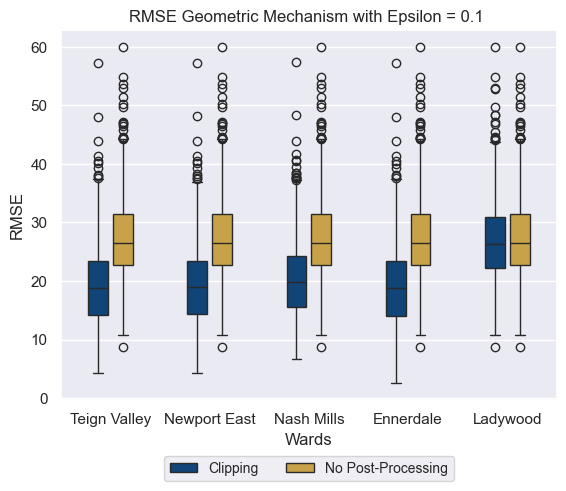

In [137]:
create_plots.create_boxplot_merged_experiments(
    df_merged, "rmse_dp", 0.1, fig_folder_name, colors_3
)

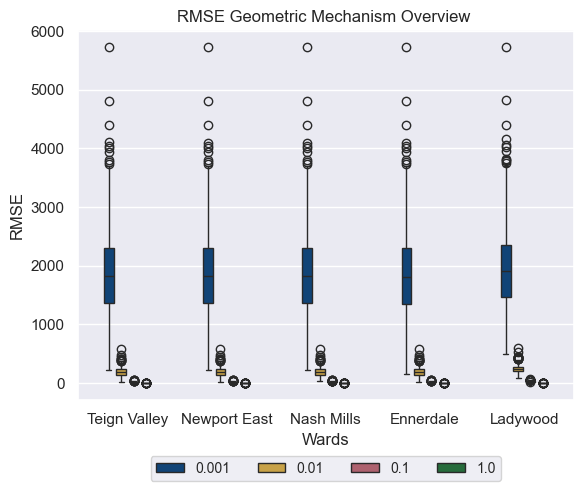

In [138]:
create_plots.create_boxplot_experiments(df_clip, "rmse_dp", fig_folder_name, colors_4)

In [139]:
create_plots.create_boxplot_experiments(
    df_no_rand, "rmse_dp", fig_folder_name, colors_4, " - No Random State", "_no_rand"
)

In [140]:
create_plots.create_boxplot_experiments(
    df_random_seed,
    "rmse_dp",
    fig_folder_name,
    colors_4,
    " - Random Seed",
    "_random_seed",
)